In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("zomato.csv",encoding="latin-1")

In [3]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
data.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
data.shape

(9551, 21)

In [7]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [10]:
data.groupby(["City","Has Online delivery"]).size().reset_index().rename(columns={0:"counts"})

,City,Has Online delivery,counts
0,Abu Dhabi,No,9
1,Abu Dhabi,Yes,11
2,Agra,No,20
3,Ahmedabad,No,10
4,Ahmedabad,Yes,11
...,...,...,...
157,Weirton,No,1
158,Wellington City,No,20
159,Winchester Bay,No,1
160,Yorkton,No,1


In [11]:
data[["Restaurant Name","Rating color"]].groupby(["Restaurant Name","Rating color"]).size().reset_index(name="count").head(5)

,Restaurant Name,Rating color,count
0,Let's Burrrp,White,1
1,#45,Yellow,1
2,#Dilliwaala6,Yellow,1
3,#InstaFreeze,White,1
4,#OFF Campus,Yellow,1


In [12]:
data["Rating color"].unique()

array(['Dark Green', 'Green', 'Yellow', 'Orange', 'White', 'Red'],
      dtype=object)

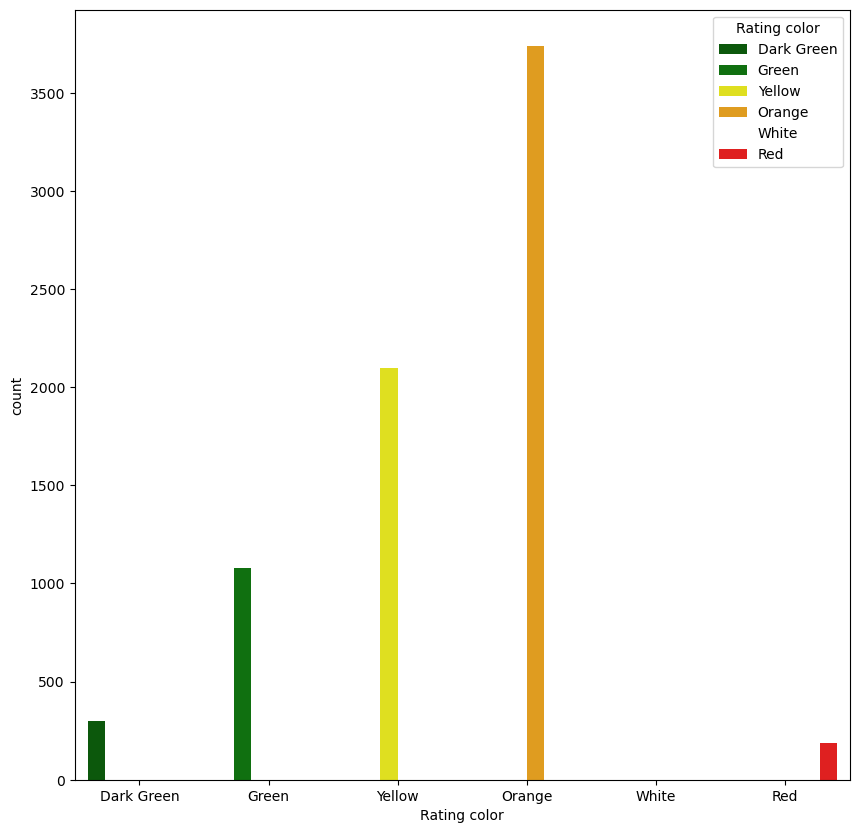

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.countplot(x="Rating color", data=data, hue ="Rating color",palette=['darkgreen', 'green', 'yellow', 'orange', 'white', 'red'])
plt.show()


C:\Users\soura\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\soura\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 138 (\x8a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\soura\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\soura\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 135 (\x87) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\soura\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\soura\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 134 (\x86) missing from current font

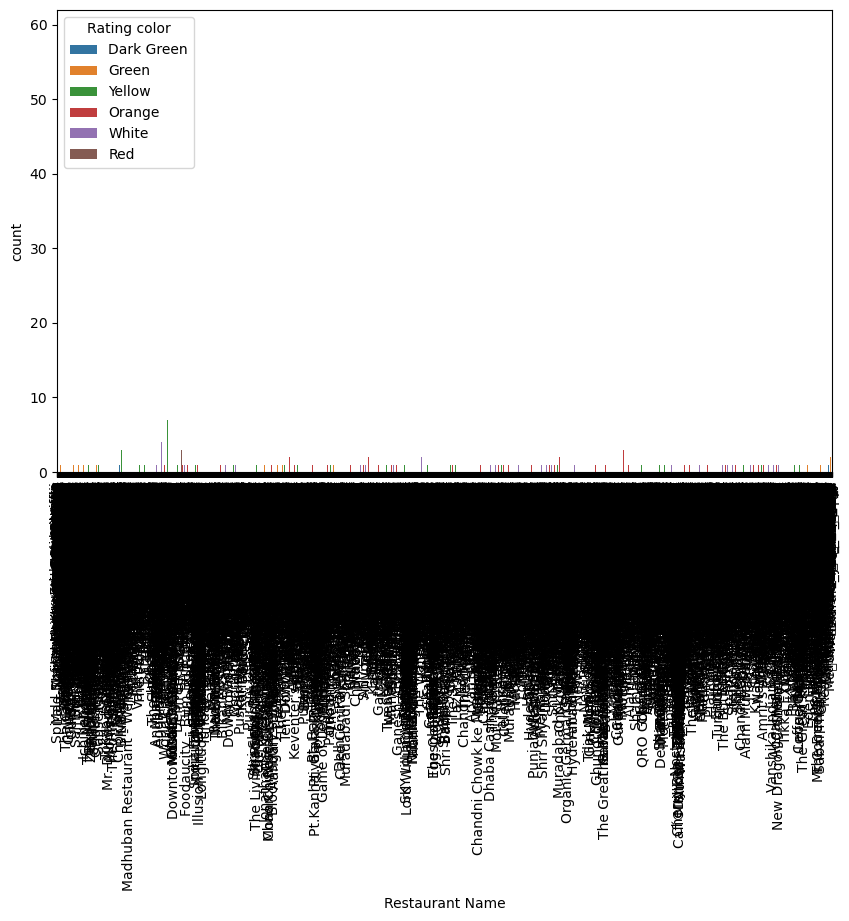

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.countplot(x="Restaurant Name", hue="Rating color", data=data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


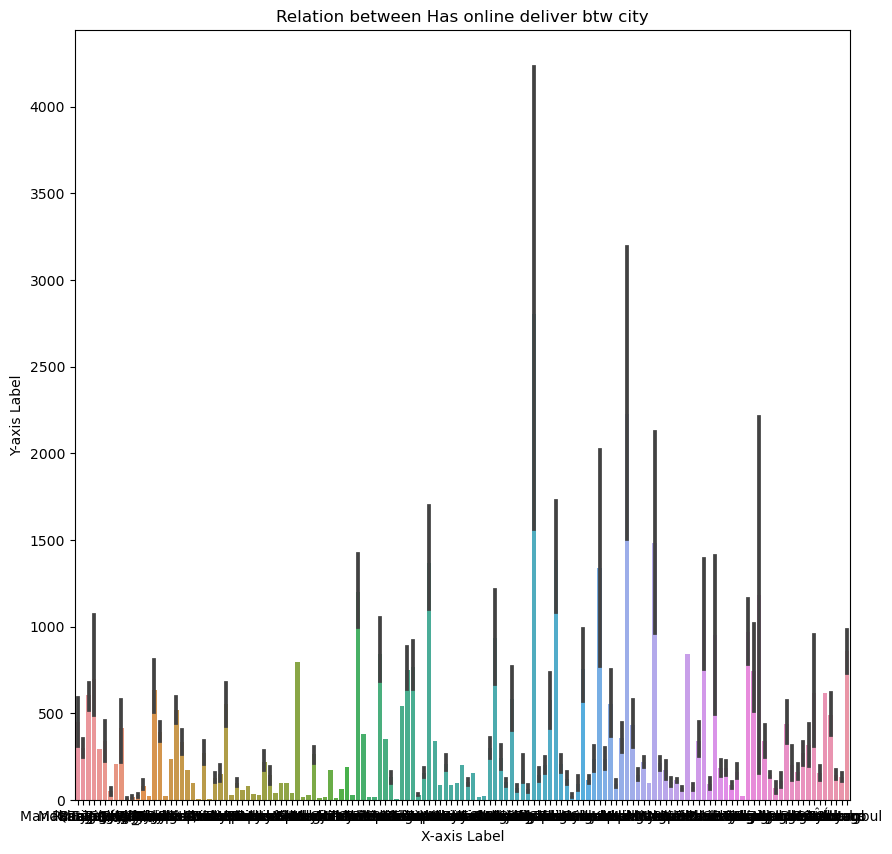

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data is your DataFrame
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
sns.barplot( x="City",y="Votes", data=data)
plt.title("Relation between Has online deliver btw city")
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.show()


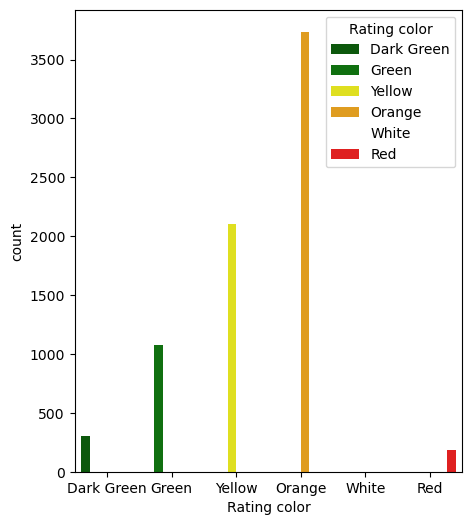

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 6))
sns.countplot(x="Rating color", data=data, hue="Rating color",palette=['darkgreen', 'green', 'yellow', 'orange', 'white', 'red'])
plt.show()


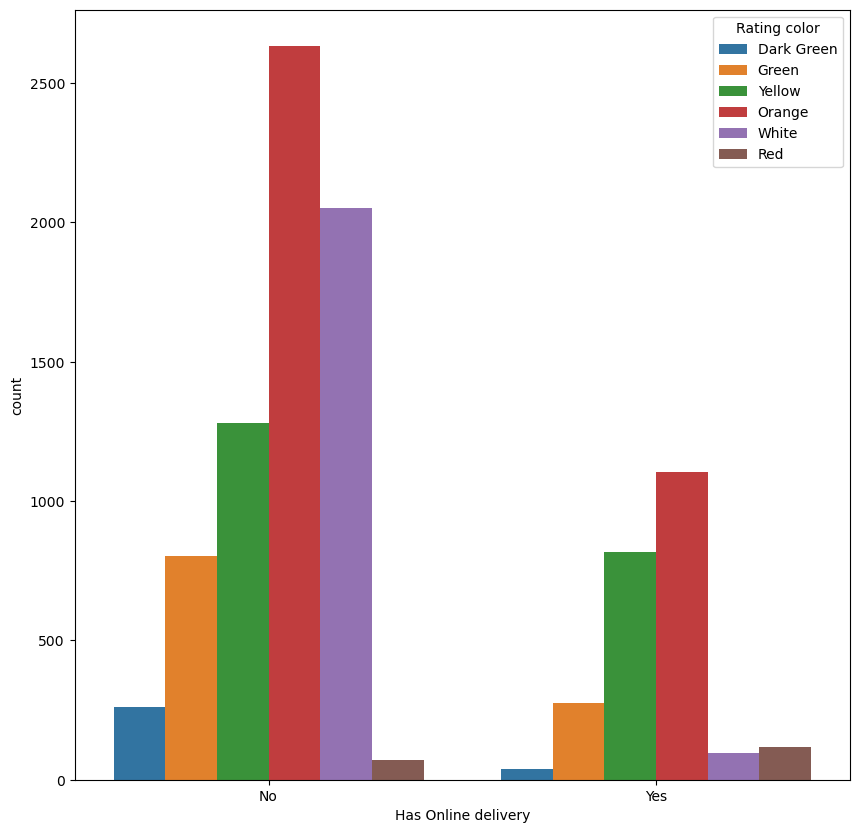

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.countplot(x='Has Online delivery', data=data, hue ="Rating color")
plt.show()

In [18]:
x=data["Is delivering now"].value_counts().index

In [19]:
y=data["Is delivering now"].value_counts().values

([<matplotlib.patches.Wedge at 0x22b962e53d0>,
 [Text(-1.099931211491959, 0.012301625332929689, 'No'),
  Text(1.0999312118338875, -0.012301594759853728, 'Yes')],
 [Text(-0.599962478995614, 0.006709977454325284, '99.64%'),
  Text(0.5999624791821204, -0.0067099607781020325, '0.36%')])

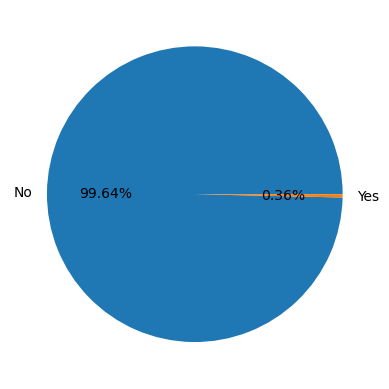

In [20]:
plt.pie(y,labels=x, autopct="%1.2f%%",)

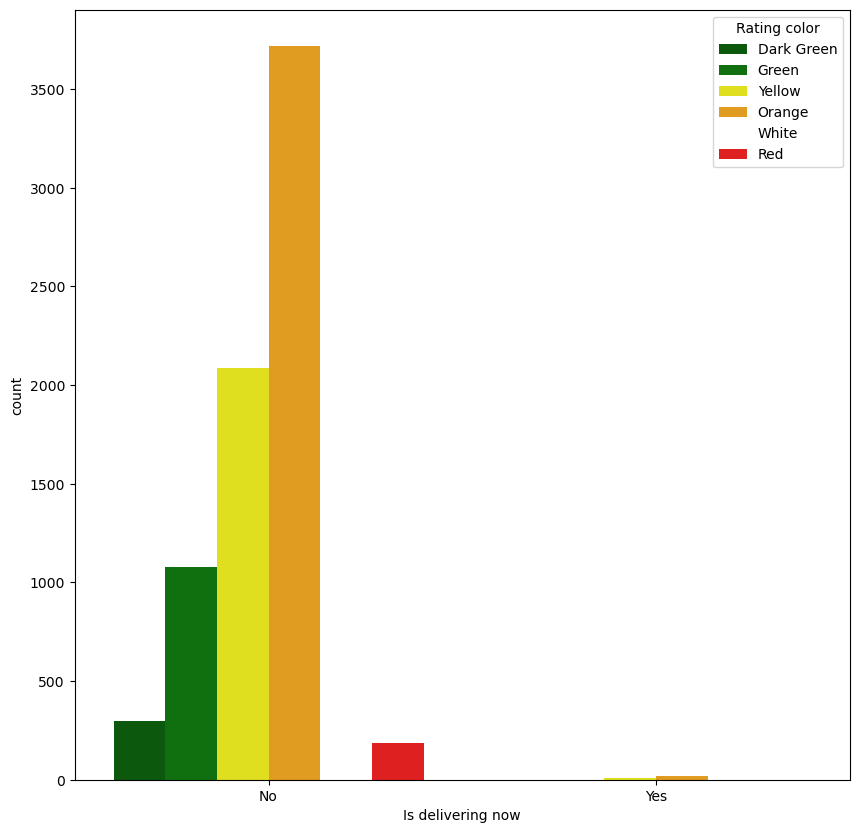

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.countplot(x="Is delivering now", data=data, hue ="Rating color",palette=['darkgreen', 'green', 'yellow', 'orange', 'white', 'red'])
plt.show()

In [27]:
data



,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [28]:
data.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [29]:
x=data.groupby(['Cuisines','Has Table booking','Is delivering now','Has Online delivery', 'Price range','Aggregate rating','Rating text','Votes']).size().reset_index(name="count").sample(50)

In [30]:
x.columns

Index(['Cuisines', 'Has Table booking', 'Is delivering now',
       'Has Online delivery', 'Price range', 'Aggregate rating', 'Rating text',
       'Votes', 'count'],
      dtype='object')

TypeError: 'AxesSubplot' object is not subscriptable

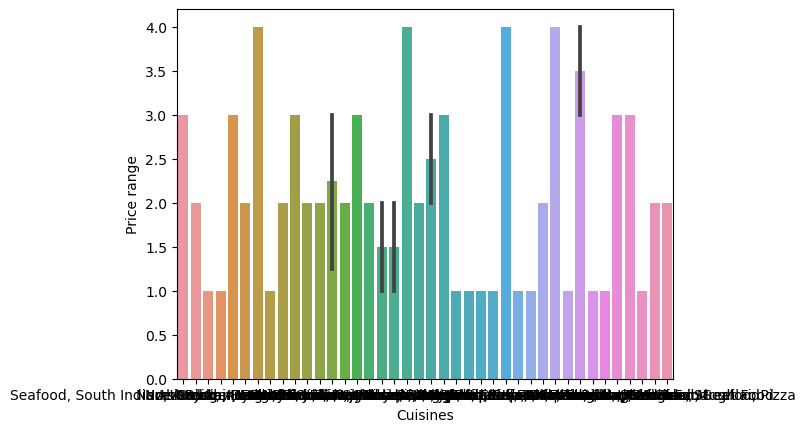

In [31]:
sns.barplot(x="Cuisines"[:50],y="Price range",data=x)[:50]

In [36]:
y=data["Rating text"].value_counts().index

In [37]:
y

Index(['Average', 'Not rated', 'Good', 'Very Good', 'Excellent', 'Poor'], dtype='object')

In [38]:
x=data["Rating text"].value_counts().values

In [39]:
x

array([3737, 2148, 2100, 1079,  301,  186], dtype=int64)

([<matplotlib.patches.Wedge at 0x22bc1140610>,
 [Text(0.3684861700797763, 1.0364448574140055, 'Average'),
  Text(-1.0997000414954674, -0.02568693704721014, 'Not rated'),
  Text(-0.16455128028787028, -1.087622579829797, 'Good'),
  Text(0.8585786329981524, -0.6876356091412253, 'Very Good'),
  Text(1.0731576417576685, -0.24152158482653235, 'Excellent'),
  Text(1.0979419528893613, -0.06725673264065082, 'Poor')],
 [Text(0.2009924564071507, 0.5653335585894576, '39.13%'),
  Text(-0.5998363862702549, -0.014011056571205528, '22.49%'),
  Text(-0.08975524379338379, -0.5932486799071619, '21.99%'),
  Text(0.4683156179989922, -0.3750739686224865, '11.30%'),
  Text(0.5853587136860009, -0.13173904626901764, '3.15%'),
  Text(0.5988774288487424, -0.03668549053126408, '1.95%')])

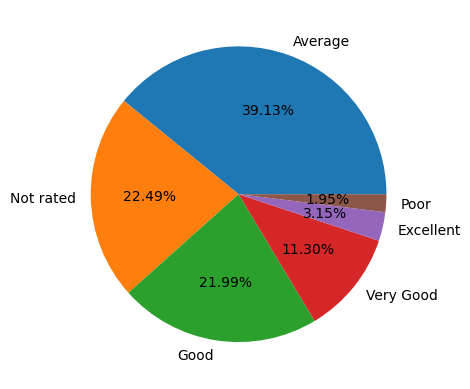

In [40]:
plt.pie(x,labels=y,autopct="%1.2f%%")

In [41]:
data.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

<AxesSubplot:xlabel='Rating text', ylabel='Price range'>

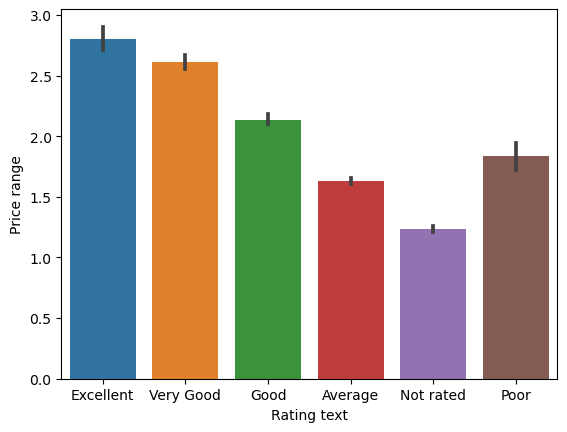

In [42]:
sns.barplot(x=data["Rating text"],y=data["Price range"],data=data)

In [43]:
data.columns



Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

<AxesSubplot:xlabel='Aggregate rating', ylabel='Votes'>

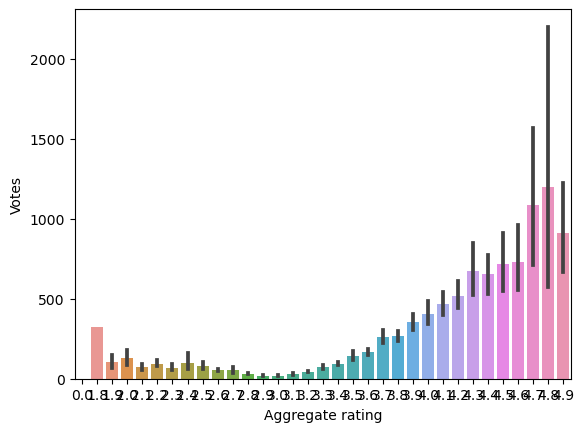

In [44]:
sns.barplot(x=data['Aggregate rating'],y=data[ 'Votes'],data=data)

In [45]:
categorical_value=data.columns[data.dtypes=="object"]

In [46]:
categorical_value

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')

In [47]:
numberical_value=data.columns[data.dtypes!="object"]

In [48]:
numberical_value

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

C:\Users\soura\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\soura\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 138 (\x8a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\soura\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\soura\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 135 (\x87) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\soura\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\soura\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 134 (\x86) missing from current font

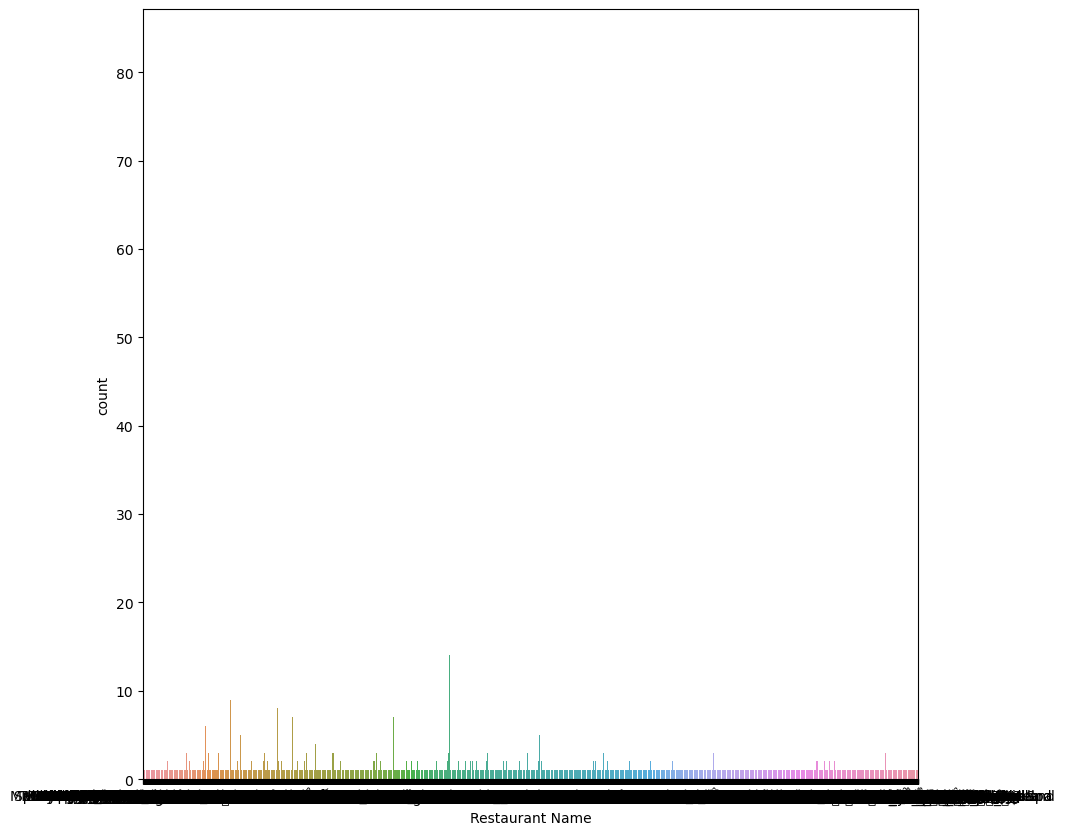

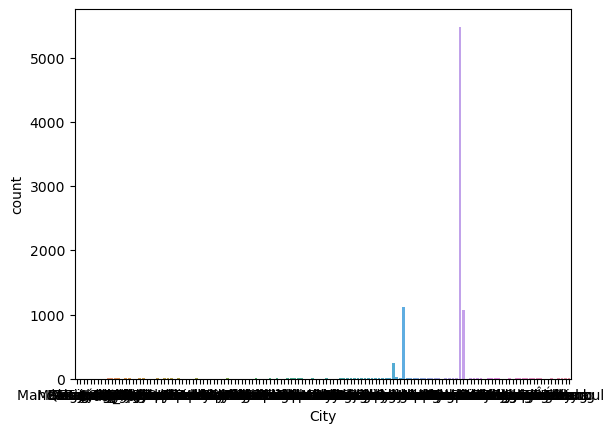

In [ ]:
plt.figure(figsize=(10,10))
for r in categorical_value:
    sns.countplot(x=r,data=data)
    plt.show()
    print("\n")
    

In [ ]:
data

In [ ]:
plt.figure(figsize=(10,10))
for r in categorical_value:
    sns.histplot(x=r,data=data)
    plt.show()
    print("\n")
    

In [ ]:
data

In [ ]:
data.columns


In [ ]:
data = data.drop(["Restaurant ID", "Country Code"], axis=1)


In [ ]:
data["Is delivering now"].unique()

In [ ]:
data["Has Online delivery"].unique()

In [ ]:
data["Price range"].unique()

In [ ]:
data["Rating color"].unique()

In [ ]:
data["Rating text"].unique()

In [ ]:
data["Has Table booking"].unique()

In [ ]:
data=data.drop("Switch to order menu",axis=1)

In [ ]:
data

In [ ]:
data["Cuisines"].unique()

In [ ]:
data["Restaurant Name"].unique()

In [ ]:
data["City"].unique()

In [ ]:
data["Locality"].unique()

In [ ]:
data["Address"].unique()

In [ ]:
data["Currency"].unique()

In [ ]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
is_delevey_now=['No']

In [ ]:
has_online_delivery=['No']


In [ ]:
rating_color=['Dark Green', 'Green', 'Yellow', 'Orange', 'White']

In [ ]:
rating_text=['Excellent', 'Very Good', 'Good', 'Average', 'Not rated']

In [ ]:
has_table_booking=['Yes', 'No']

In [ ]:
cusisine=['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', 'Japanese, Sushi',
       'Japanese, Korean', 'Chinese', 'Asian, European',
       'Seafood, Filipino, Asian, European', 'European, Asian, Indian',
       'Filipino', 'Filipino, Mexican', 'American, Ice Cream, Desserts',
       'Korean', 'Cafe, American, Italian, Filipino', 'Italian, Pizza',
       'Cafe, Korean, Desserts', 'Cafe, Bakery, American, Italian',
       'Seafood, American, Mediterranean, Japanese',
       'American, Asian, Italian, Seafood', 'Fast Food, French', 'Cafe',
       'Bakery', 'Brazilian', 'Pizza', 'Arabian', 'Brazilian, Cafe',
       'Italian', 'Bar Food, Brazilian', 'Mexican, Grill',
       'International', 'Peruvian, Latin American', 'American, Grill',
       'Seafood', 'American, Burger', 'Seafood, Bar Food, Brazilian',
       'Desserts, Cafe', 'Juices, Healthy Food',
       'Beverages, Bar Food, Fast Food', 'Lebanese', 'Burger',
       'Brazilian, Bar Food', 'Brazilian, Healthy Food, Juices, Pizza']

In [ ]:
restaurant_name=['Le Petit Souffle', 'Izakaya Kikufuji', 'Heat - Edsa Shangri-La',
       'Ooma', 'Sambo Kojin', 'Din Tai Fung', 'Buffet 101', 'Vikings',
       'Spiral - Sofitel Philippine Plaza Manila', 'Locavore',
       'Silantro Fil-Mex', "Mad Mark's Creamery & Good Eats",
       "Guevarra's", 'Sodam Korean Restaurant', 'Cafe Arabelle',
       "Nonna's Pasta & Pizzeria", 'Balay Dako',
       'Hobing Korean Dessert Cafe', 'Wildflour Cafe + Bakery',
       'NIU by Vikings', 'The Food Hall by Todd English', 'Chez Michou',
       'Cafí© Daniel Briand', 'Casa do Biscoito Mineiro', 'Maori',
       'Pizza íæ Bessa', 'Sushi Loko', 'Beirute', 'New Koto',
       'Sandubas Cafí©', 'Villa Tevere', 'Rovereto', 'Buena Carne',
       'Taco Pep', 'Coco Bambu', 'Taypíç', 'Outback Steakhouse',
       'Manzuíç', 'Gero', 'Brazilian American Burgers',
       'Pesqueiro Eco Gourmet', 'Confeitaria Colombo', 'Bibi',
       'Cervantes', 'Amir', 'TT Burger', 'Braseiro da Gíçvea',
       'Balada Mix']

In [ ]:
city=['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Brasí_lia', 'Rio de Janeiro']

In [ ]:
locality=['Century City Mall, Poblacion, Makati City',
       'Little Tokyo, Legaspi Village, Makati City',
       'Edsa Shangri-La, Ortigas, Mandaluyong City',
       'SM Megamall, Ortigas, Mandaluyong City',
       'SM by the Bay, Mall of Asia Complex, Pasay City',
       'Sofitel Philippine Plaza Manila, Pasay City', 'Kapitolyo',
       'UP Town Center, Diliman, Quezon City', 'Addition Hills',
       'Little Baguio', 'Nuvali, Don Jose, Santa Rosa',
       'Solenad 3, Don Jose, Santa Rosa', 'Tagaytay City',
       'BGC Stopover Pavillion, Bonifacio Global City',
       'Bonifacio Global City',
       'SM Aura Premier, Bonifacio Global City, Taguig City', 'Asa Norte',
       'Asa Sul', 'í\x81guas Claras', 'Brasí_lia Shopping, Asa Norte',
       'Lago Sul', 'ParkShopping, Guaríç I', 'Pontí£o Lago Sul, Lago Sul',
       'Setor De Clubes Esportivos Sul', 'Shopping Iguatemi, Lago Norte',
       'Sudoeste', 'Barra da Tijuca', 'Centro', 'Copacabana',
       'Galeria River, Copacabana', 'Gíçvea', 'Ipanema']

In [ ]:
address=['Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City',
       'Little Tokyo, 2277 Chino Roces Avenue, Legaspi Village, Makati City',
       'Edsa Shangri-La, 1 Garden Way, Ortigas, Mandaluyong City',
       'Third Floor, Mega Fashion Hall, SM Megamall, Ortigas, Mandaluyong City',
       'Third Floor, Mega Atrium, SM Megamall, Ortigas, Mandaluyong City',
       'Ground Floor, Mega Fashion Hall, SM Megamall, Ortigas, Mandaluyong City',
       'Building K, SM By The Bay, Sunset Boulevard, Mall of Asia Complex (MOA), Pasay City',
       'Building B, By The Bay, Seaside Boulevard, Mall of Asia Complex (MOA), Pasay City',
       'Plaza Level, Sofitel Philippine Plaza Manila, CCP Complex, Pasay City',
       'Brixton Technology Center, 10 Brixton Street, Kapitolyo, Pasig City',
       '75 East Capitol Drive, Kapitolyo, Pasig City',
       '23 East Capitol Drive, Kapitolyo, Pasig City',
       'Second Floor, UP Town Center, Katipunan Avenue, Diliman, Quezon City',
       '387 P. Guevarra Corner Argonne Street, Addition Hills, San Juan City',
       '17 J. Abad Santos Drive, Little Baguio, San Juan City',
       'Ayala Mall, Solenad, Nuvali, Santa Rosa - Tagaytay Road, Don Jose, Santa Rosa',
       'Ground Floor, Building G, Solenad 3, Nuvali, Don Jose, Santa Rosa',
       'Aguinaldo Highway, Tagaytay City',
       'Third Floor, BGC Stopover Pavillion, Rizal Drive Corner 31st Street, Bonifacio Global City, Taguig City',
       'Ground Floor, Netlima Building, 4th Avenue Corner 26th Street, Bonifacio Global City, Taguig City',
       'Sixth Floor, SM Aura Premier, C5 Road Corner 26th Street, Bonifacio Global City, Taguig City',
       'Fifth Floor, SM Aura Premier, C5 Corner 26th Street, Bonifacio Global City, Taguig City',
       'SCLN, 208, Bloco A, Loja 30, Asa Norte, Brasí_lia',
       'SCLN 104, Bloco A, Loja 26, Asa Norte, Brasí_lia',
       'SCLN 210, Bloco D, Loja 36/48, Asa Norte, Brasí_lia',
       'CLN 110, Bloco D, Loja 28, Asa Norte, Brasí_lia',
       'SCS 214, Bloco C, Loja 40, Asa Sul, Brasí_lia',
       'SCS 213, Bloco C, Loja 35, Asa Sul, Brasí_lia',
       'CLS 109, Bloco A, Loja 2/6, Asa Sul, Brasí_lia',
       'SCS 212, Bloco B, Loja 26, Asa Sul, Brasí_lia',
       'Edifí_cio Josí© Severo, SCS 6, Bloco A, Loja 99, Asa Sul, Brasí_lia',
       'CLS 115, Bloco A, Loja 2, Asa Sul, Brasí_lia',
       'Rua 13 Norte, Lote 4, í\x81guas Claras, Brasí_lia',
       'Avenida Araucíçrias, 1325, Loja 19, í\x81guas Claras, Brasí_lia',
       'Vila Malls, Avenida das Castanheiras, Lote 1060, í\x80guas Claras, Brasí_lia',
       'Brasí_lia Shopping - Piso 2, SCN 5, Bloco A, Asa Norte, Brasí_lia',
       'Fashion Park, Shis Ql 17, Bloco G, Loja 208, Lago Sul, Brasí_lia',
       'ParkShopping - Piso 2, SAI/SO, í\x81rea 6580, Guaríç I, Brasí_lia',
       'Pontí£o Lago Sul, SHIS 10, Lote 9, Lago Sul, Brasí_lia',
       'SCES, Trecho 2, Conjunto 13/36, Setor de Clubes Esportivos Sul, Brasí_lia',
       'Shopping Iguatemi - piso 1, SHIN CA 4, Lote A, Lago Norte, Brasí_lia',
       'CLSN 301, Bloco C, Loja 86, Sudoeste, Brasí_lia',
       'Praia da Barra da Tijuca, Avenida Lí_cio Costa, Ilha 25, Barra da Tijuca, Rio de Janeiro',
       'Rua Goní_alves Dias, 32, Centro, Rio de Janeiro',
       'Rua Santa Clara, 36, Copabana, Rio de Janeiro',
       'Avenida Prado Junior, 335 B, Copacabana, Rio de Janeiro',
       'Rua Ronald de Carvalho, 55, Copacabana, Rio de Janeiro',
       'Galeria River, Rua Francisco Otaviano, 67, Copacabana, Rio de Janeiro',
       'Praí_a Santos Dumont, 116, Gíçvea, Rio de Janeiro',
       'Rua Aní_bal de Mendoní_a, 37, Ipanema, Rio de Janeiro']

In [ ]:
col=[is_delevey_now,has_online_delivery,rating_color,rating_text,has_table_booking,cusisine,restaurant_name,city,locality,address]

In [ ]:
data.columns

In [ ]:
data=data.drop("Locality Verbose",axis=1)

In [ ]:
data

In [ ]:
categ=data.select_dtypes(include='object').columns

In [ ]:
numeric=data.select_dtypes(exclude='object').columns

In [ ]:
categ

In [ ]:
numeric=numeric[:5]

In [ ]:
numeric

In [ ]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
num_pipeline=Pipeline(
    
    
    steps=[
        
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
    
    
)

In [ ]:
cat_pipeline=Pipeline(
    
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('ordinalencoder',OrdinalEncoder(categories=[is_delevey_now,has_online_delivery,rating_color,rating_text,has_table_booking,cusisine,restaurant_name,city,locality,address]))
    ]
    
)

In [ ]:
preprocessor=ColumnTransformer(
    [
        
        ('num_pipeline',num_pipeline,numeric),
        ('cat_pipeline',cat_pipeline,categ)
    ]
)

In [ ]:
data

In [ ]:
X=data.drop("Votes",axis=1)

In [ ]:
len(X.columns)

In [ ]:
y=data[["Votes"]]

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [ ]:
X_train

In [ ]:
X_test

In [1]:
preprocessor.fit_transform(X_train)

NameError: name 'preprocessor' is not defined